In [11]:
import numpy as np
import osmnx as ox
import networkx as nx
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
G = ox.graph_from_place('Wrocław, Poland', network_type='bike')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

KeyboardInterrupt: 

In [12]:
G = ox.graph_from_point((51.1099, 17.0355), network_type='bike')
G_projected = ox.project_graph(G)
fig, ax = ox.plot_graph(G_projected, fig_height=20, fig_width=20, show=False)

In [15]:
good_orig_node = ox.get_nearest_node(G, (51.104405, 17.02338), method='euclidean')
# bad_orig_node = ox.get_nearest_node(G, (25.071764, 55.138978), method='euclidean')
dest_node = ox.get_nearest_node(G, (51.117021, 17.042163), method='euclidean')

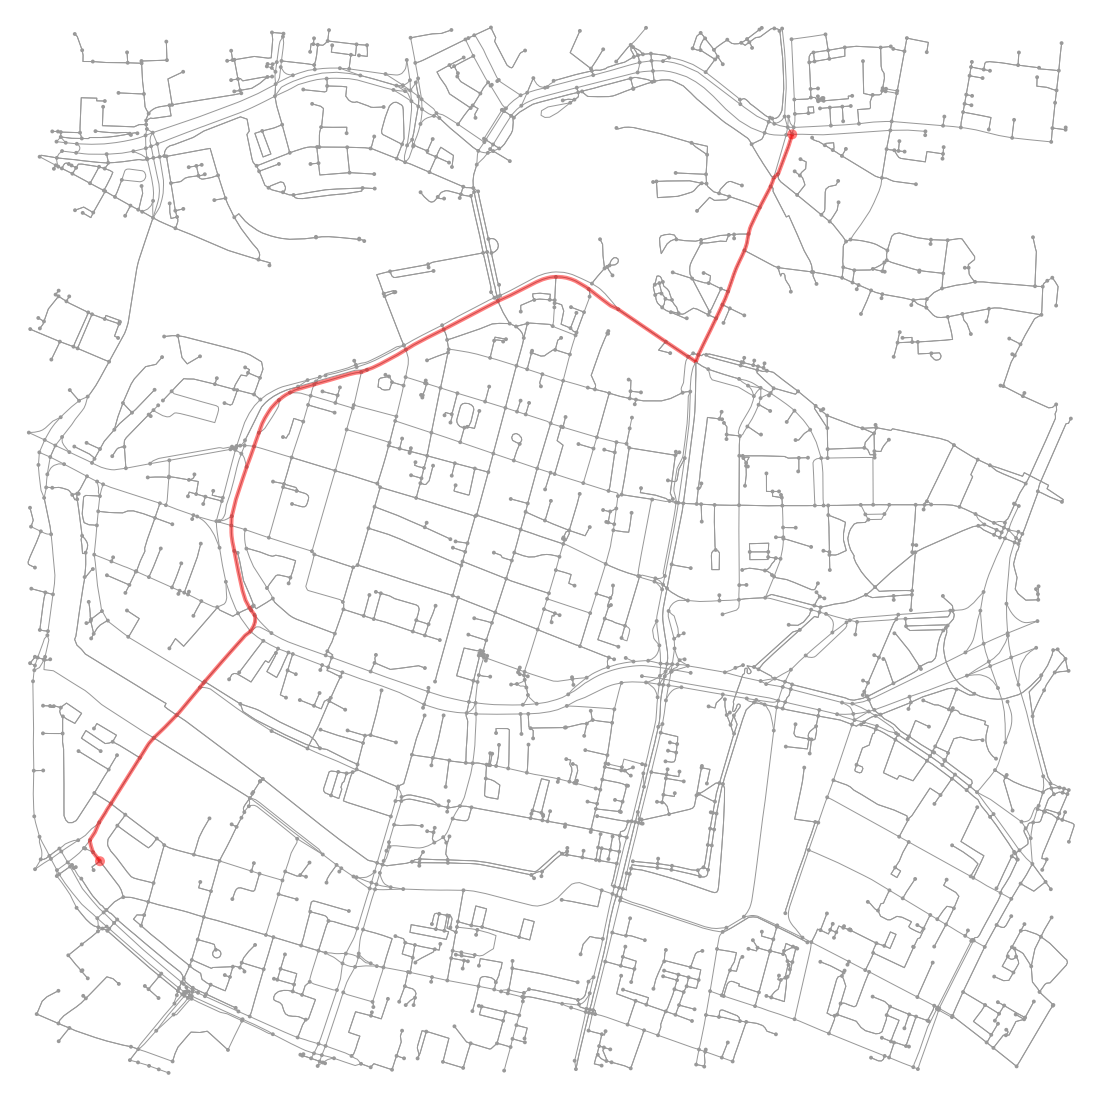

In [16]:

route = nx.shortest_path(G, good_orig_node, dest_node, weight='length')
fig, ax = ox.plot_graph_route(G, route, fig_height=20, fig_width=20)

In [17]:
route

[6335910115,
 173945044,
 167105546,
 167105510,
 173945039,
 3199926966,
 167105519,
 3361944448,
 3610684453,
 2961797143,
 2961797147,
 165109432,
 165109643,
 3768388886,
 232400919,
 6047432388,
 232400764,
 3212216736,
 165109998,
 165109671,
 173178373,
 165109679,
 165109685,
 339867390,
 165109698,
 1981064491,
 165109705,
 300461040,
 171222080,
 232428869,
 1888048057,
 232428892,
 3227962713,
 311408007,
 167074791,
 4450286818,
 254858085,
 2918012988,
 321766352,
 311408023,
 430707861,
 305594499,
 2964724282,
 167074547,
 2013583269,
 167074387]

In [33]:
route_data = ox.geo_utils.get_route_edge_attributes(G, route, minimize_key='length')

In [39]:
print(route_data)

[{'osmid': 16804348, 'lanes': '2', 'name': 'Plac Legionów', 'highway': 'residential', 'maxspeed': '50', 'oneway': False, 'length': 22.131, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fdc40e945d0>}, {'osmid': [16804352, 506686963], 'oneway': True, 'lanes': '1', 'name': 'Plac Legionów', 'highway': 'residential', 'length': 23.24, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fdc36173e50>}, {'osmid': 16313663, 'oneway': True, 'lanes': '2', 'name': 'Sądowa', 'highway': 'tertiary', 'maxspeed': '50', 'length': 38.583999999999996, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fdc3281abd0>}, {'osmid': 16313659, 'oneway': False, 'lanes': '4', 'name': 'Sądowa', 'highway': 'tertiary', 'maxspeed': '50', 'length': 42.571000000000005, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fdc3d195150>}, {'osmid': [385168224, 746578743], 'oneway': False, 'lanes': '4', 'name': 'Sądowa', 'highway': 'tertiary', 'maxspeed': '50', 'length

In [57]:
path_map = [r['geometry'].xy if 'geometry' in r else '' for r in route_data]

In [60]:
path_map

[(array('d', [17.023208, 17.023038, 17.0230142]),
  array('d', [51.104555, 51.1046931, 51.1047125])),
 (array('d', [17.0230142, 17.022965, 17.0229383, 17.0229314]),
  array('d', [51.1047125, 51.1048097, 51.1048817, 51.1049145])),
 (array('d', [17.0229314, 17.0229437, 17.0230705, 17.0231576, 17.0231868]),
  array('d', [51.1049145, 51.1049292, 51.1050517, 51.1051784, 51.1052209])),
 (array('d', [17.0231868, 17.0231967, 17.0232025, 17.023357, 17.0233997, 17.0234086, 17.0235098]),
  array('d', [51.1052209, 51.1052309, 51.1052371, 51.1053908, 51.1054392, 51.1054484, 51.1055455])),
 (array('d', [17.0235098, 17.0235851, 17.0236017, 17.0236152, 17.0240481, 17.0242727, 17.0242987]),
  array('d', [51.1055455, 51.1056206, 51.1056371, 51.1056507, 51.1060818, 51.1063054, 51.1063313])),
 (array('d', [17.0242987, 17.0243296, 17.0244775, 17.0244957, 17.0245222, 17.0245511, 17.0246811]),
  array('d', [51.1063313, 51.1063605, 51.1065099, 51.1065282, 51.1065532, 51.1065806, 51.1066735])),
 (array('d', [1